# 🖼️ Image Stitching with OpenCV

## Overview
This notebook demonstrates how to load, display, and stitch multiple images together into a panoramic view using **OpenCV**.  
We utilize image reading, color conversion, visualization with Matplotlib, and OpenCV’s built-in image stitching API.

## Objectives
- Load and preprocess multiple images from a directory.
- Visualize all images in a grid layout.
- Apply OpenCV's `cv2.Stitcher_create()` to combine images into a seamless panorama.
- Display the final stitched image for evaluation.

## Key Learnings
- How to read multiple images using `glob` and sort them for processing.
- Converting images from **BGR** to **RGB** for correct visualization in Matplotlib.
- Arranging multiple images in a subplot grid dynamically using **rows and columns calculation**.
- Leveraging OpenCV’s high-level panorama stitching functionality.
- Understanding stitching status codes and handling results.

## Tools & Libraries
- **OpenCV**: Image reading, processing, and stitching.
- **Matplotlib**: Visualization of input and output images.
- **Glob**: Reading multiple file paths from a directory.
- **Math**: Calculating optimal subplot grid layout.


# Steps for Creating Panoramas using OpenCV

1. Use the **sticher** class


In [1]:
import cv2
import glob
import matplotlib.pyplot as plt
import math

## Step 0: Read and Display Images

We will load all images from the folder and display them to visualize what we want to stitch.


In [2]:
# Read Images

imagefiles = glob.glob("./data/boat/*")
imagefiles.sort()

images = []
for filename in imagefiles:
  img = cv2.imread(filename)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  images.append(img)

num_images = len(images)

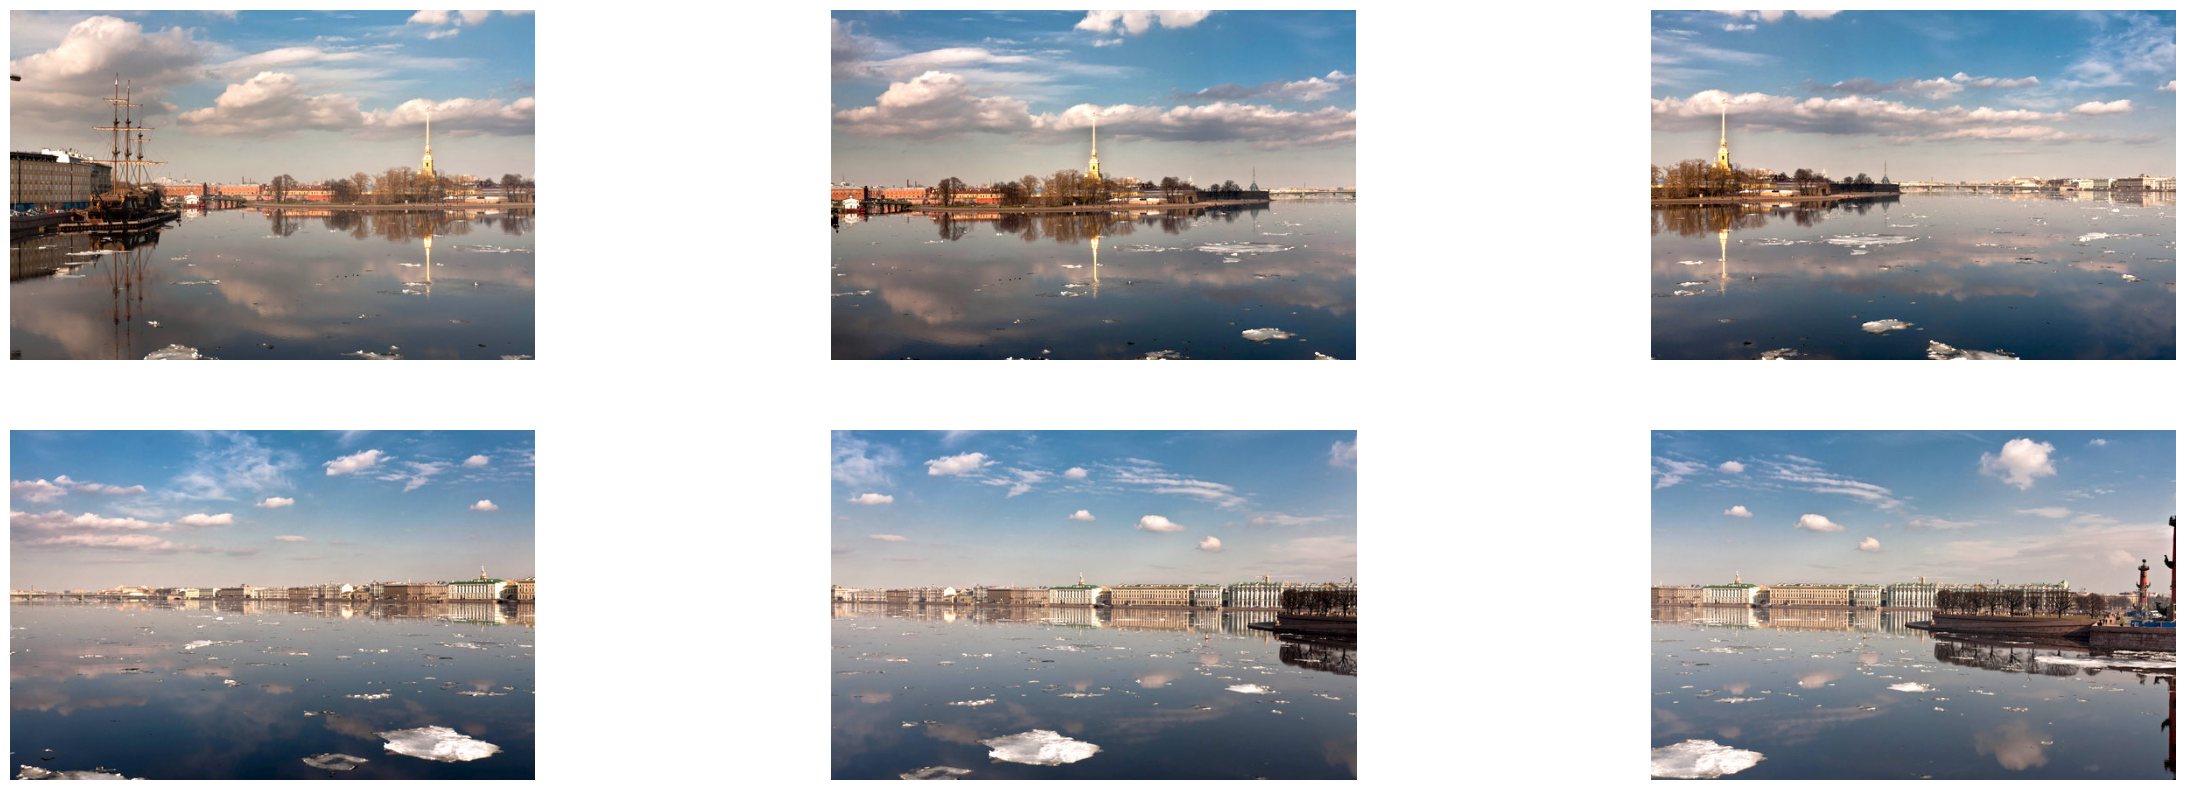

In [3]:
# Display Images
plt.figure(figsize=[30,10]) 
num_cols = 3
num_rows = math.ceil(num_images / num_cols)
for i in range(0, num_images):
  plt.subplot(num_rows, num_cols, i+1) 
  plt.axis('off')
  plt.imshow(images[i])


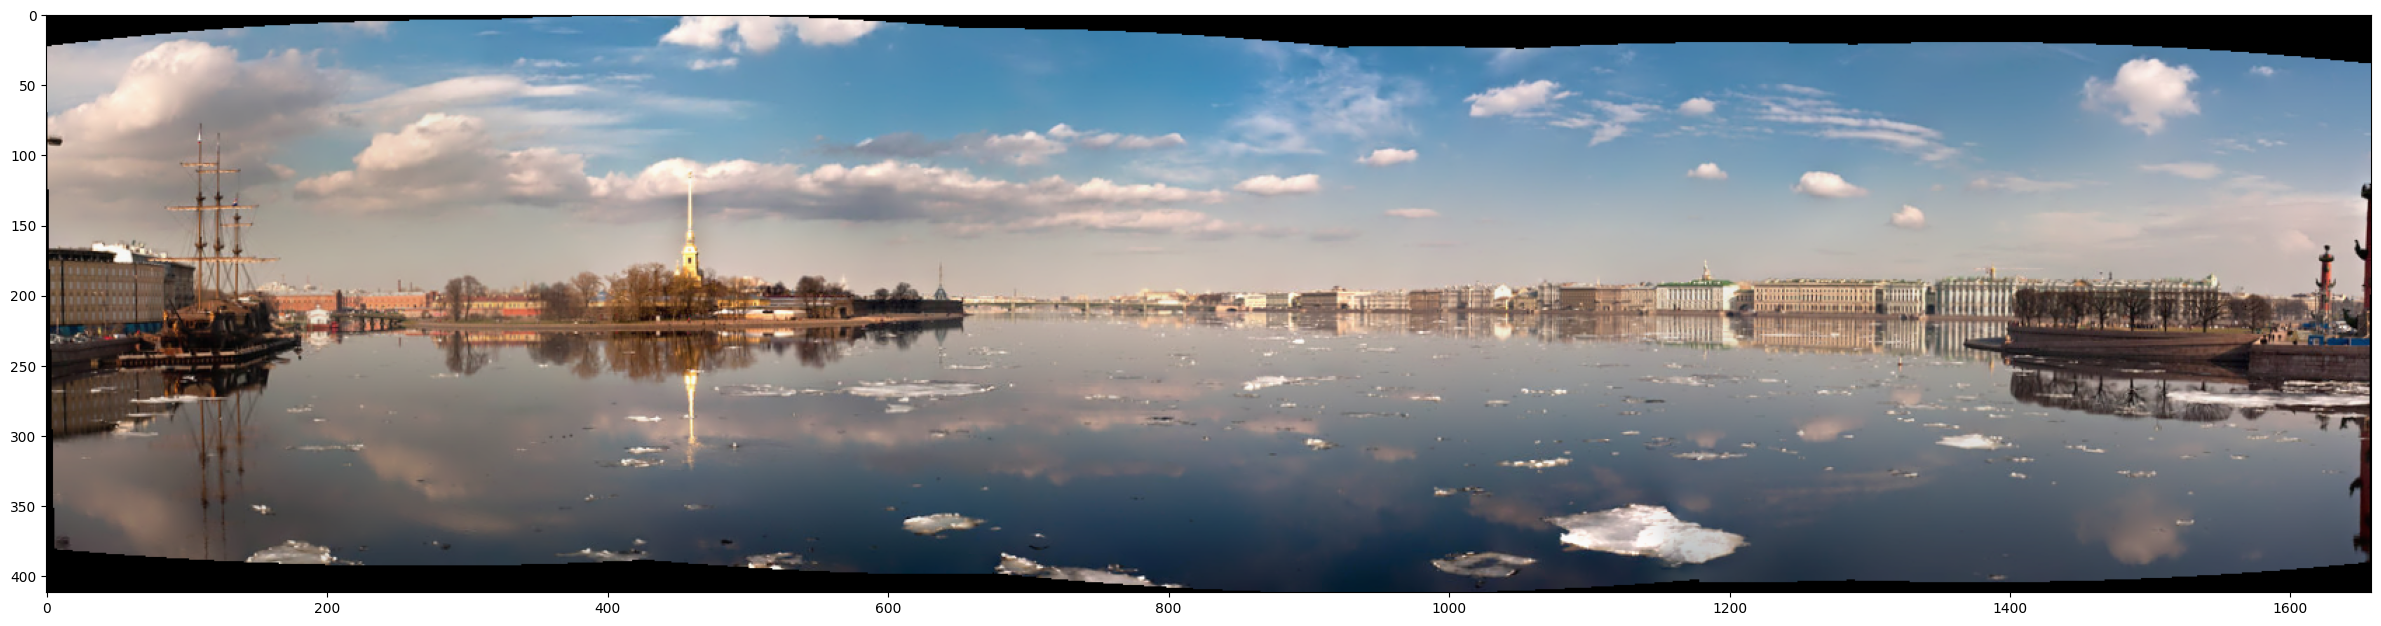

In [11]:
# Stitch Images
stitcher = cv2.Stitcher_create()
status, result = stitcher.stitch(images)
if status == 0:
  plt.figure(figsize=[30,10]) 
  plt.imshow(result)